In [60]:
import collections
import importlib
from  janome.tokenizer import Tokenizer
import re
import pathlib
from py import my_module as mm
importlib.reload(mm)


<module 'py.my_module' from 'c:\\Users\\asozan\\Dropbox\\Python\\W\\Pythonではじめる情報検索プログラミング\\py\\my_module.py'>

In [22]:
!pip install janome

# 語

## 形態素解析

東京都，京都があるように単純に「京都」では欲しい情報を抜き出しているとは限らない. つまり，東京都は東＋京都という意味ではないため，京都だけを観てマッチしても意味がないのである．

これに対して語に適切な区切りを与える方法を考える必用がある. 


英語のように語がスペース区切りの場合には，その区切りを利用することで，テキストデータを単語単に分割することができる. 

In [18]:
data_dir = pathlib.Path("irpb-files/data")
alice    = data_dir / "ch02" / "alice.txt"


In [20]:
string = mm.get_string_from_file(alice)
tokens = re.split("[ \n\.]+", string)
for t in tokens[:10]:
    print(t)

ALICE’S
ADVENTURES
IN
WONDERLAND
Lewis
Carroll
THE
MILLENNIUM
FULCRUM
EDITION


日本語でも同様の処理を行うには，文を解析して適切な区切りを推定する必要がある．

**形態素解析**はそのための手段である. 

In [24]:
tokenizer = Tokenizer()
string = "すもももももももものうち"
for t in tokenizer.tokenize(string):
    print("{}\t{}".format(t.surface, t.part_of_speech))

すもも	名詞,一般,*,*
も	助詞,係助詞,*,*
もも	名詞,一般,*,*
も	助詞,係助詞,*,*
もも	名詞,一般,*,*
の	助詞,連体化,*,*
うち	名詞,非自立,副詞可能,*


上記のコードでは各形態素の表層形が`t.surface`として，品詞情報が`t.part_of_speech`として得られる．

品詞情報は「,」で区切られているので，たとえば品詞名は`t.part_of_speech.split(",")[0]`として取り出せる. 

表層情報だけを取り出す，すなわち分かち書きしたい場合には，`wakati=True`ヲ使う. 



In [26]:
list(tokenizer.tokenize(string, wakati = True))

['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']

`janome`のような形態素解析には辞書が必要である．

つまり，辞書に載っていない固有名詞などは扱うことが出来ない. 

固有名詞を扱うにはユーザー辞書を指定する必要がある. 

In [32]:
string = "ふなっしーかわいい"
tokenizer = Tokenizer("irpb-files/data/ch02/userdic.csv", udic_type = "simpledic")
for t in tokenizer.tokenize(string):
    print("{}\t{}".format(t.surface, t.part_of_speech))

ふなっしー	名詞,*,*,*
かわいい	形容詞,自立,*,*


In [35]:
file_list = list(data_dir.glob("ch01/0*.txt"))
file_list

[WindowsPath('irpb-files/data/ch01/01.txt'),
 WindowsPath('irpb-files/data/ch01/02.txt'),
 WindowsPath('irpb-files/data/ch01/03.txt'),
 WindowsPath('irpb-files/data/ch01/04.txt')]

In [37]:
query = "東京都"

for f in file_list:
    print(f, mm.get_m_snippet_from_file(f, query))

irpb-files\data\ch01\01.txt None
irpb-files\data\ch01\02.txt None
irpb-files\data\ch01\03.txt None
irpb-files\data\ch01\04.txt 築地市場は東京都江東区の


## Bag of words

形態素の出現順序を考慮せず，種類と出現回数に着目する. 

まずはワードクラウドを実践してみる. 

In [56]:
file = data_dir / "ch01" / "melos.txt"
string = mm.get_string_from_file(file)
words  = mm.get_words(string)
count  = collections.Counter(words)

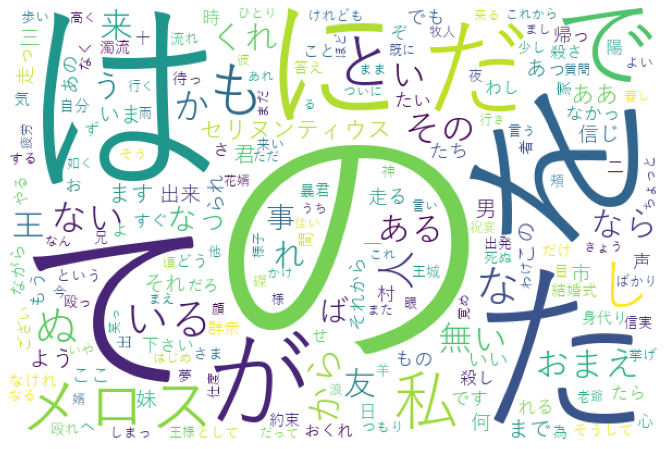

In [59]:
font = mm.get_japanese_fonts()[0]
mm.create_word_cloud(count, font)

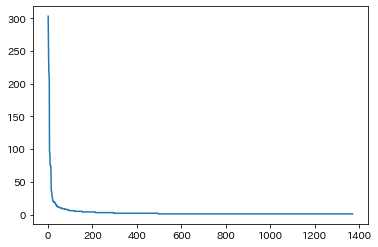

In [61]:
mm.plot_frequecy(count)

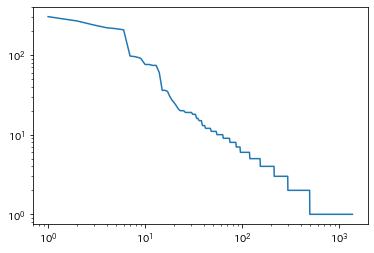

In [63]:
mm.plot_frequecy(count, log_scale = True)